# Guided Capstone Step 3 Exploratory Data Analysis

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. You will also implement k-means clustering, complete clusters, and update data frame as a CSV file. Let's get started! 


  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.listdir()

['.config', 'drive', 'sample_data']

In [6]:
file='/content/drive/MyDrive/Big_Mountain_Resort/ski_resort_step2_output.csv'
df=pd.read_csv(file)
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,2,0,0,2,7,76.0,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric features in your data set and build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

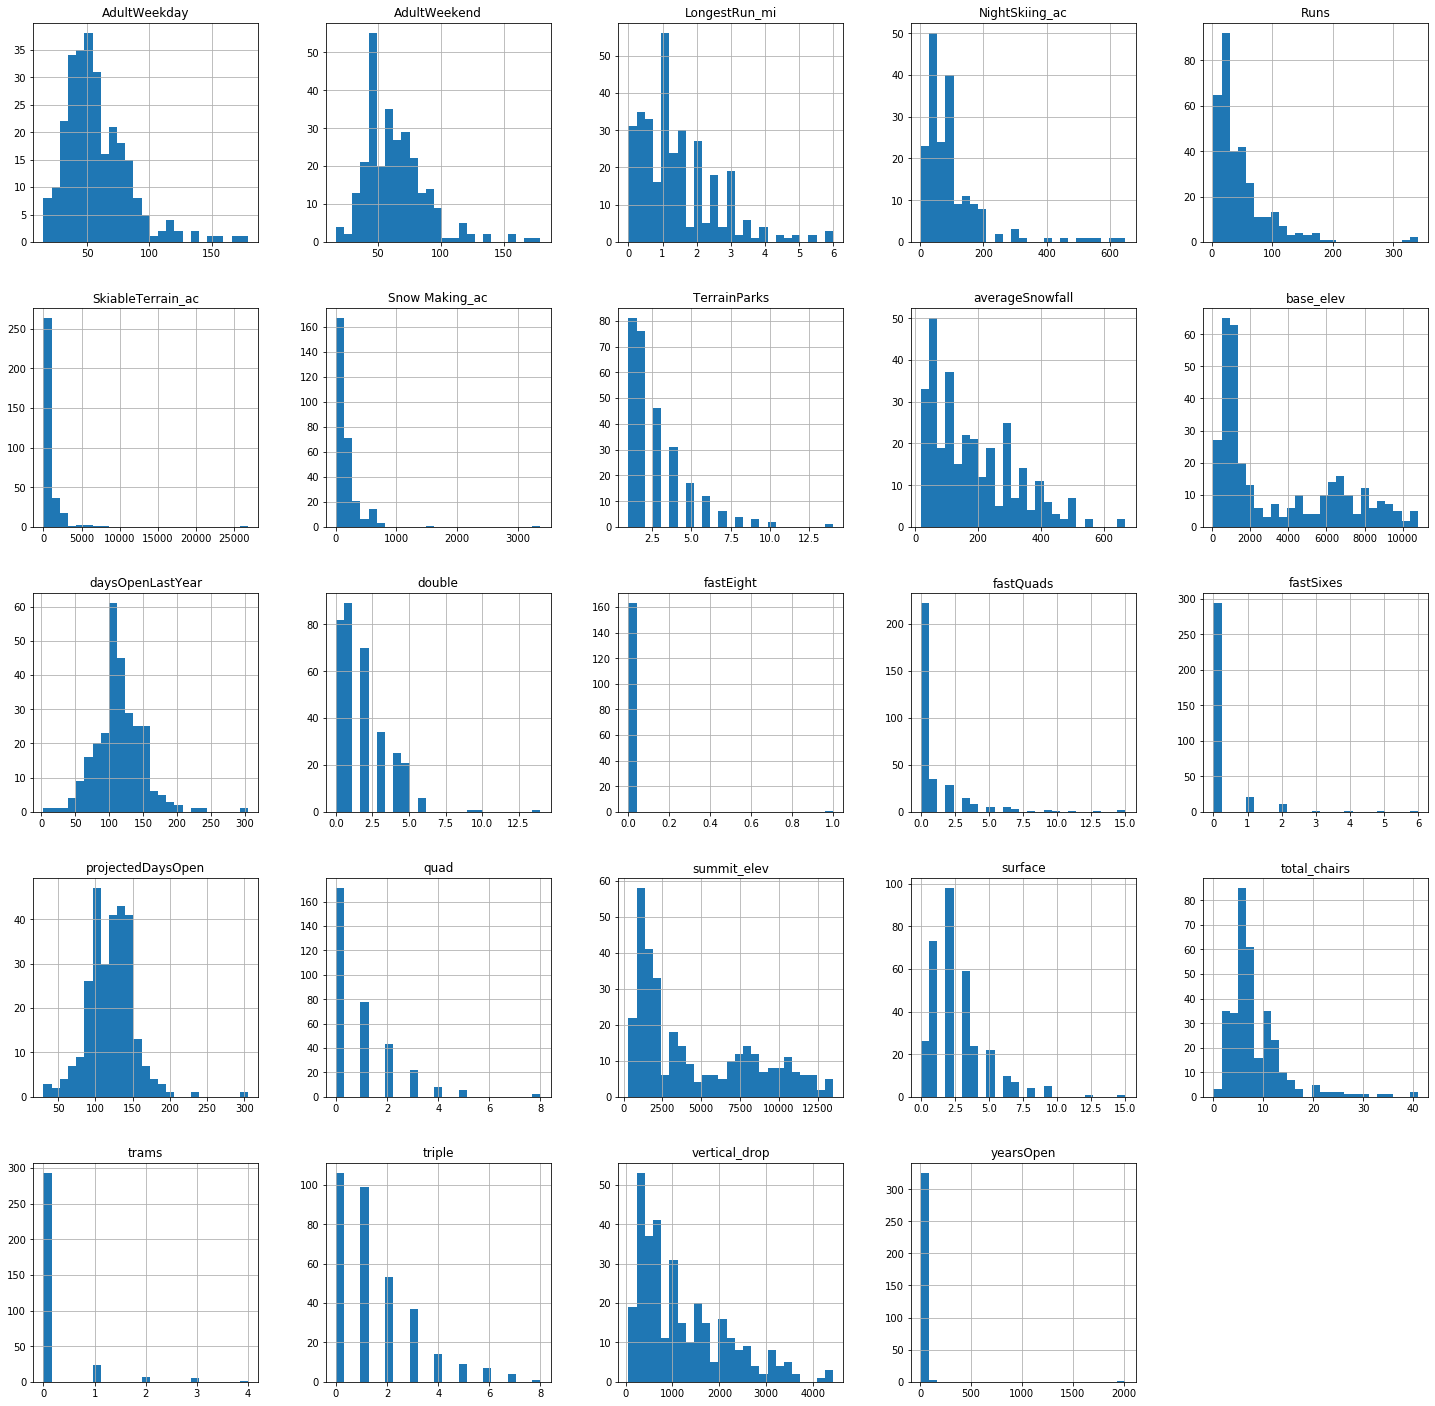

In [ ]:
hist = df.hist(bins=25,figsize =(25,25))

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data look like. Let's create a barplot for the categorical features `Region` and `state` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

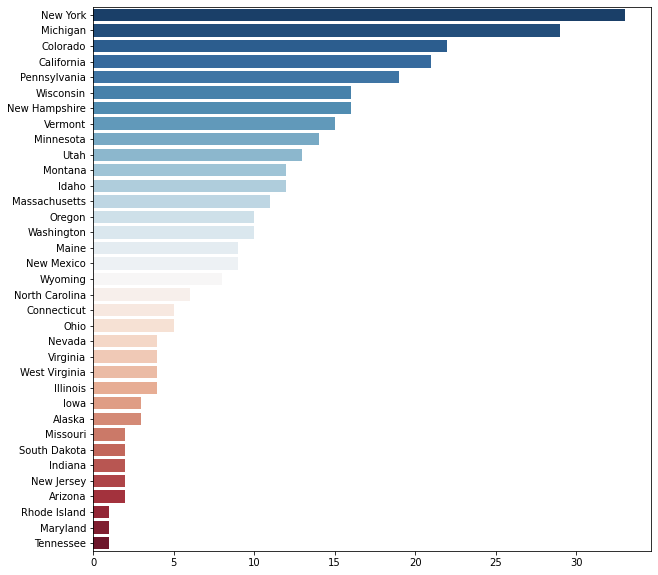

In [8]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.state.value_counts())
names = list(x.index)
values = list(x.state)
sns.barplot(x=values, y=names, palette="RdBu_r")

In [9]:
mydata=pd.DataFrame(df.state.value_counts())

**<font color='teal'>Region Levels Plot</font>**

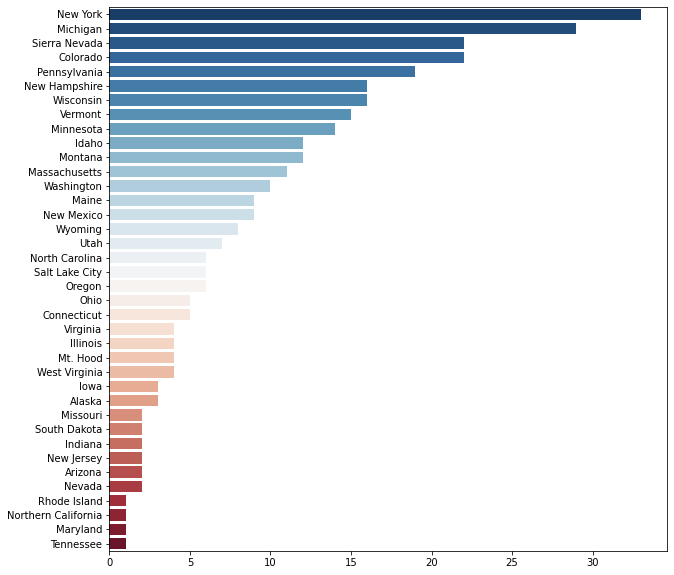

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.Region.value_counts())
names = list(x.index)
values = list(x.Region)
sns.barplot(x=values, y=names, palette="RdBu_r")

By reviewing the State and Regions counts plots you should notice that the Region feature is nearly identical to the state and therfore we can remove from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [11]:
df=df.drop(['Region'],axis=1)
df.columns

Index(['Name', 'state', 'summit_elev', 'vertical_drop', 'base_elev', 'trams',
       'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple', 'double',
       'surface', 'total_chairs', 'Runs', 'TerrainParks', 'LongestRun_mi',
       'SkiableTerrain_ac', 'Snow Making_ac', 'daysOpenLastYear', 'yearsOpen',
       'averageSnowfall', 'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen',
       'NightSkiing_ac'],
      dtype='object')

## Anamolies & Outliers - Review boxplots

**<font color='teal'> Print boxplot for every column</font>**

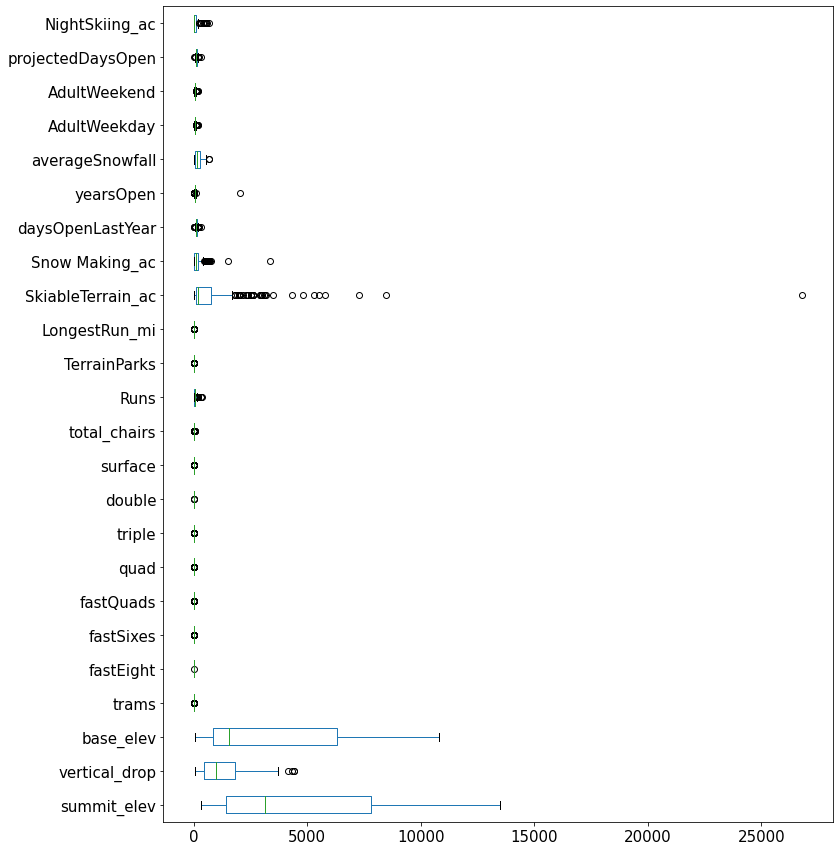

In [13]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

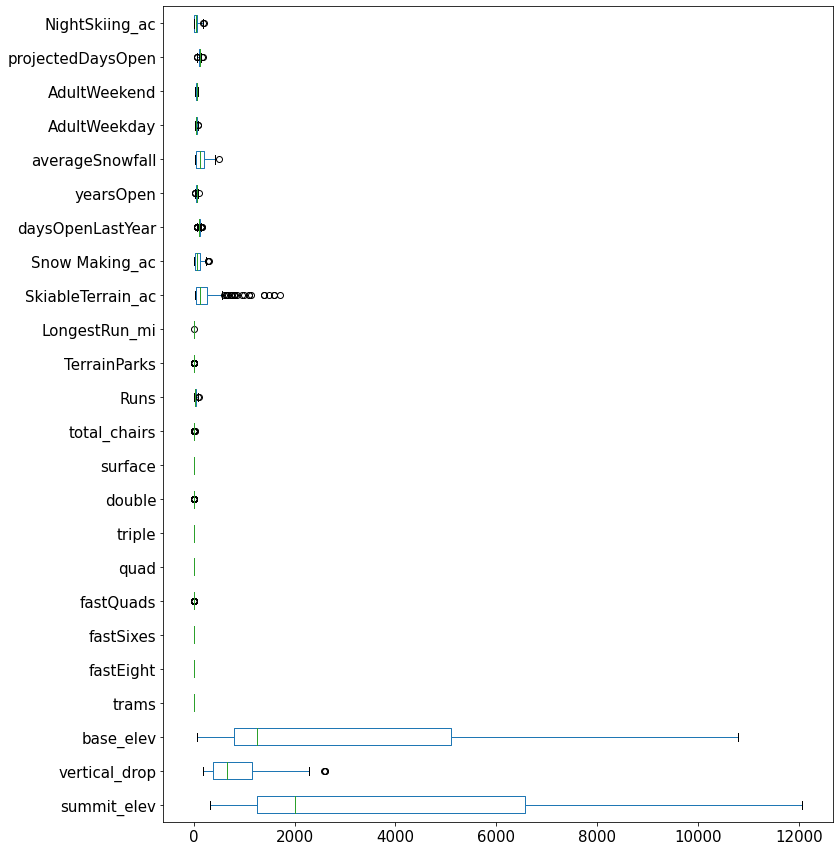

In [14]:
#Remove outliers based on IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
boxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

In [15]:
print(df.shape)
dfno.shape

(330, 26)


(176, 26)

There are many ways to discover and remove outliers, and what counts as a sensible way of doing so depends on your problem, your methodology for solving that problem, and the nature of your data. 

Each method will have its merits and demerits. As we can see, in this instance, we've lost a great many observations! 

There is no hard and fast rule as to which outlier removal method is best in all cases, and you will have to exercise your good judgement in arriving at an appropriate method for your problem at hand. We will cover outlier removal in more depth in sections 7 (Data Wrangling) and 10 (Statistics for Exploratory Data Analysis) of the course. 

There are many possible response variables you could have identified in the Step 1 guided capstone exercise. However, for the rest of this guided capstone project we will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, we need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, we want to predict the number of days open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

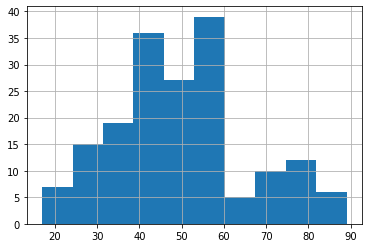

In [16]:
dfno['AdultWeekday'].hist()

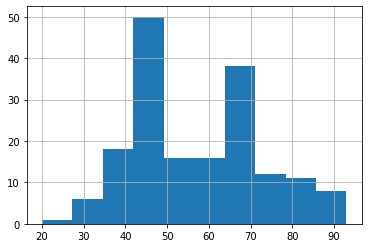

In [17]:
dfno['AdultWeekend'].hist()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

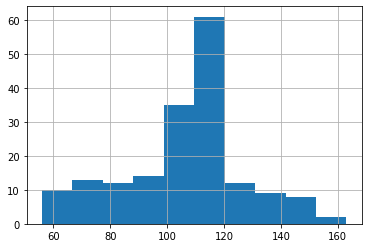

In [19]:
dfno['daysOpenLastYear'].hist()

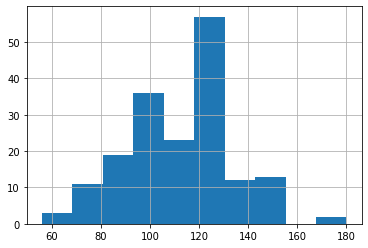

In [20]:
dfno['projectedDaysOpen'].hist()

After reviewing these respons varible distributions, there doesn't appear to be any data issues to mitigate. Now, we move on to investigating feature relationship and interactions between the features the response.

# Explore data relationships

<font color='teal'>**Create pairplots or what is commonly referred to as biplots**</font>

In [21]:
#pair plots
g = sns.pairplot(dfno)

Output hidden; open in https://colab.research.google.com to view.

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

Hint: such heatmaps are covered in Aiden's EDA article [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-exploratory-data-analysis-bc84d4d8d3f9). 

In [22]:
corr = dfno.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1.000000,0.620000,0.990000,nan,nan,nan,0.150000,-0.050000,0.060000,0.090000,-0.380000,-0.100000,0.500000,0.040000,0.370000,0.620000,-0.060000,0.290000,0.210000,0.680000,0.410000,0.250000,0.290000,-0.240000
vertical_drop,0.620000,1.000000,0.490000,nan,nan,nan,0.400000,-0.050000,0.080000,0.230000,-0.340000,0.060000,0.740000,0.120000,0.630000,0.670000,0.220000,0.260000,0.260000,0.570000,0.580000,0.530000,0.310000,-0.180000
base_elev,0.990000,0.490000,1.000000,nan,nan,nan,0.080000,-0.050000,0.050000,0.060000,-0.350000,-0.120000,0.410000,0.020000,0.290000,0.560000,-0.120000,0.270000,0.180000,0.640000,0.340000,0.170000,0.250000,-0.230000
trams,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastEight,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastSixes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fastQuads,0.150000,0.400000,0.080000,nan,nan,nan,1.000000,0.140000,0.180000,0.140000,0.060000,0.430000,0.370000,0.270000,0.380000,0.190000,0.440000,0.220000,0.020000,0.080000,0.460000,0.470000,0.240000,0.140000
quad,-0.050000,-0.050000,-0.050000,nan,nan,nan,0.140000,1.000000,0.160000,-0.170000,0.190000,0.360000,0.070000,0.120000,-0.030000,-0.080000,0.220000,0.140000,-0.080000,-0.200000,0.150000,0.230000,0.100000,0.160000
triple,0.060000,0.080000,0.050000,nan,nan,nan,0.180000,0.160000,1.000000,-0.120000,0.110000,0.520000,0.130000,0.320000,0.110000,-0.030000,0.320000,0.060000,-0.030000,-0.010000,0.240000,0.310000,0.090000,0.280000
double,0.090000,0.230000,0.060000,nan,nan,nan,0.140000,-0.170000,-0.120000,1.000000,-0.020000,0.470000,0.340000,0.320000,0.210000,0.280000,0.220000,0.060000,0.220000,0.150000,0.210000,0.220000,0.140000,0.110000


When reviewing the Pearson correlation coefficient heat map you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in our final model development data set. Then select those features that are more than 95% correlated for removal.**</font>

In [32]:
# Create correlation matrix
corr_matrix = dfno.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [33]:
print('Features selected to drop include',to_drop)

Features selected to drop include []


In [34]:
print('Reduced dataframe size ',dfno.drop(dfno[to_drop], axis=1).shape)

Reduced dataframe size  (176, 25)


In [35]:
# Let's drop base_elev
dfno=dfno.drop(['base_elev'],axis =1)

KeyError: ignored

Now we address the feature creation piece of this step. We can create additional features through many methods such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as Kmeans clustering and using the clusters as features in our model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your kmeans clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [36]:
from sklearn.cluster import KMeans
x = dfno.drop(['Name','state'], axis =1).values

In [ ]:
Error =[]
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i).fit(x)
   kmeans.fit(x)
   Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the kmeans algorithm with the k parameter set to three and plot the results.**</font>

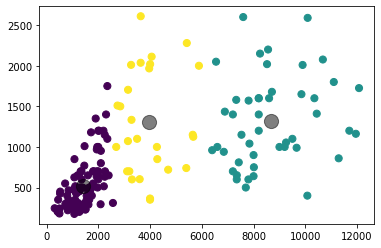

In [31]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [37]:
dfno['clusters']=y_kmeans3

In [40]:
dfno.to_csv('/content/drive/MyDrive/Big_Mountain_Resort/step3_output.csv',index=False)